In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [30]:
warnings.filterwarnings('ignore')

In [31]:
os.chdir('E:\\COVID\\covid-chestxray-dataset-master')

In [32]:
data=pd.read_csv('metadata.csv')

In [33]:
pd.set_option('display.max_columns',100)

In [34]:
data.head(2)

,patientid,offset,sex,age,finding,survival,temperature,pO2 saturation,leukocyte count,neutrophil count,lymphocyte count,view,modality,date,location,folder,filename,doi,url,license,clinical notes,other notes,Unnamed: 22
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN


In [35]:
data1=data[['finding','filename']]

In [36]:
data1['finding'].value_counts()

COVID-19          188
Streptococcus      17
Pneumocystis       15
SARS               11
E.Coli              4
ARDS                4
COVID-19, ARDS      2
No Finding          2
Legionella          2
Chlamydophila       2
Klebsiella          1
Name: finding, dtype: int64

In [37]:
data2=data1[data1['finding'] == 'COVID-19'] 

In [38]:
data2=data2.reset_index()
data2=data2.drop('index',axis=1)

In [39]:
print(data2.shape)
data2

(188, 2)


,finding,filename
0,COVID-19,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...
1,COVID-19,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...
2,COVID-19,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...
3,COVID-19,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...
4,COVID-19,nejmc2001573_f1a.jpeg
...,...,...
183,COVID-19,radiopaedia_org_covid-19-pneumonia-10_85902_1-...
184,COVID-19,radiopaedia_org_covid-19-pneumonia-10_85902_3-...
185,COVID-19,radiopaedia_org_covid-19-pneumonia-36_86526_0-...
186,COVID-19,radiopaedia_org_covid-19-pneumonia-27_86410_0-...


In [ ]:
# taking only covid cases

In [40]:
file=list(data2['filename'])


In [41]:
file

['auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'nejmc2001573_f1a.jpeg',
 'nejmc2001573_f1b.jpeg',
 'lancet-case2a.jpg',
 'lancet-case2b.jpg',
 '1-s2.0-S0140673620303706-fx1_lrg.jpg',
 'nCoV-radiol.2020200269.fig1-day7.jpeg',
 'nejmoa2001191_f1-PA.jpeg',
 'nejmoa2001191_f1-L.jpeg',
 'nejmoa2001191_f3-PA.jpeg',
 'nejmoa2001191_f3-L.jpeg',
 'nejmoa2001191_f4.jpeg',
 'nejmoa2001191_f5-PA.jpeg',
 'nejmoa2001191_f5-L.jpeg',
 'ryct.2020200034.fig2.jpeg',
 'ryct.2020200034.fig5-day0.jpeg',
 'ryct.2020200034.fig5-day4.jpeg',
 'ryct.2020200034.fig5-day7.jpeg',
 'ryct.2020200028.fig1a.jpeg',
 'jkms-35-e79-g001-l-a.jpg',
 'jkms-35-e79-g001-l-b.jpg',
 'jkms-35-e79-g001-l-c.jpg',
 'jkms-35-e79-g001-l-d.jpg',
 'jkms-35-e79-g001-l-e.jpg',
 'radiol.2020

In [42]:
import os

# path to image folder, get all filenames on this folder
# and store it in the onlyfiles list

mypath = "E:\\COVID\\covid-chestxray-dataset-master\images"
onlyfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

# your list of dogID's
lis1 = file

# create two seperate lists from onlyfiles list based on lis1 and lis2
lis1files = [i for i in onlyfiles for j in lis1 if j in i]

# create two sub folders in mypath folder
subfolder1 = os.path.join(mypath, "lis1")

# check if they already exits to prevent error
if not os.path.exists(subfolder1):
    os.makedirs(subfolder1)

# move files to their respective sub folders
for i in lis1files:
    source = os.path.join(mypath, i)
    destination = os.path.join(subfolder1, i)
    os.rename(source, destination)


In [ ]:
# Removing duplicate images.

In [45]:
def file_hash(filepath):
    with open(filepath,'rb')as f:
        return md5(f.read()).hexdigest()

In [46]:
import os
os.getcwd()

'E:\\COVID\\covid-chestxray-dataset-master'

In [47]:
os.chdir('E:\\COVID\\NonAugmentedTrain\\Combine data\\dupli')

In [48]:
os.getcwd()

'E:\\COVID\\NonAugmentedTrain\\Combine data\\dupli'

In [49]:
file_list=os.listdir()
print(len(file_list))

231


In [50]:
import hashlib,os
duplicates=[]
hash_keys=dict()
for index,filename in enumerate(os.listdir('.')): 
    if os.path.isfile(filename):
        with open(filename,'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
        if filehash not in hash_keys:
            hash_keys[filehash] = index
        else:duplicates.append((index,hash_keys[filehash]))
            
            

In [51]:
duplicates

[(158, 157), (159, 157), (160, 157)]

In [52]:
from scipy.ndimage import imread


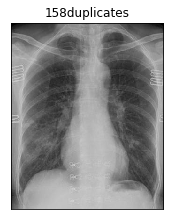

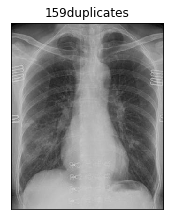

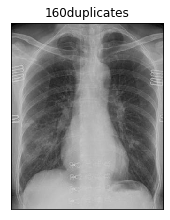

In [53]:
for file_indexes in duplicates:
    try:
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[1]]))
        plt.title(file_indexes[1]),plt.xticks([]),plt.yticks([])
        
        plt.subplot(121),plt.imshow(imread(file_list[file_indexes[0]]))
        plt.title(str(file_indexes[0])+'duplicates'),plt.xticks([]),plt.yticks([])
        plt.show()
        
    except OSError as e:
        continue

In [54]:
for index in duplicates:
    os.remove(file_list[index[0]])

In [2]:
# model building

In [3]:
#Importing Necessary Libraries.
import pandas as pd
import os
os.chdir('E:\\COVID\\NonAugmentedTrain')


from PIL import Image
import numpy as np
import os
import cv2
import keras  
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

Using TensorFlow backend.


In [4]:
# assign lables to each images present under specific classified folders.
# also coverting all images to RGB format so that all images have one standard
# Resolution may be different of images so converting all to 50,50 shape.

data=[]
labels=[]
BacterialPneumonia=os.listdir("E:/COVID/NonAugmentedTrain/Combine data/BacterialPneumonia/")
for a in BacterialPneumonia:
    try:
        image=cv2.imread("E:/COVID/NonAugmentedTrain/Combine data/BacterialPneumonia/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")
        
COVID=os.listdir("E:/COVID/NonAugmentedTrain/Combine data/dupli/")
for b in COVID:
    try:
        image=cv2.imread("E:/COVID/NonAugmentedTrain/Combine data/dupli/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
        
Normal=os.listdir("E:/COVID/NonAugmentedTrain/Combine data/Normal/")
for c in Normal:
    try:
        image=cv2.imread("E:/COVID/NonAugmentedTrain/Combine data/Normal/"+c)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")

ViralPneumonia=os.listdir("E:/COVID/NonAugmentedTrain/Combine data/ViralPneumonia/")
for d in ViralPneumonia:
    try:
        image=cv2.imread("E:/COVID/NonAugmentedTrain/Combine data/ViralPneumonia/"+d)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((50, 50))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

# labels given are 0,1,2 and 3

In [5]:
Cells=np.array(data)
labels=np.array(labels)

# now cells consist of array of pixels of image and labels consist of corresponding class to it.

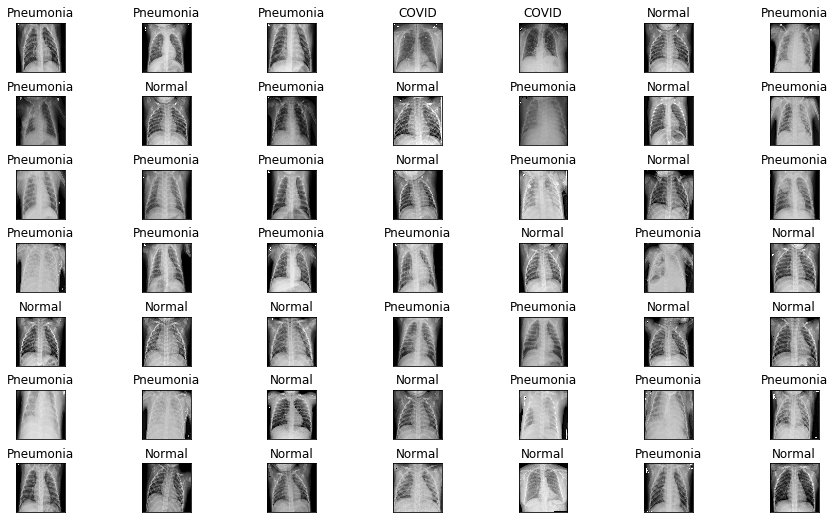

In [6]:
# displaying images after classifing them, and converting numberic class to its distinguish categorical class


import matplotlib.pyplot as plt


plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , Cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(Cells[r[0]])
    plt.title('Pneumonia' if labels[r[0]] == 0 else ('COVID' if  labels[r[0]] == 1 else( 'Normal'  if labels[r[0]] == 2 else 'ViralPneumonia' )))
    plt.xticks([]) , plt.yticks([])
    
plt.show()

In [7]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

# shuffling of images so that images should not get trained in serial class order

In [8]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

# assign no. of class for model and determine length 

In [9]:
# train test split
# making data for validation

In [10]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by divinding 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [11]:
x_train.shape

(1953, 50, 50, 3)

In [12]:
x_test.shape

(217, 50, 50, 3)

In [13]:
Cells.shape

(2170, 50, 50, 3)

In [14]:
# assign labels

(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]
A=y_test
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [15]:
# saved classes before transforming it to array
A

array([2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1,
       1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2])

In [16]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
#creating sequential model
# Accuracy can be improve in future by changing parameters and no. assign to parameters

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3,activation="softmax"))# represent output layer neurons 
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
______________________

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test, y_test))




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1953 samples, validate on 217 samples
Epoch 1/30





1953/1953 [==============================] - 16s 8ms/step - loss: 0.7594 - acc: 0.6795 - val_loss: 0.4691 - val_acc: 0.8387
Epoch 2/30
1953/1953 [==============================] - 7s 3ms/step - loss: 0.3795 - acc: 0.8510 - val_loss: 0.3011 - val_acc: 0.8894
Epoch 3/30
1953/1953 [==============================] - 7s 3ms/step - loss: 0.2660 - acc: 0.9053 - val_loss: 0.3242 - val_acc: 0.8802
Epoch 4/30
1953/1953 [==============================] - 7s 4ms/step - loss: 0.2042 - acc: 0.9288 - val_loss: 0.2015 - val_acc: 0.9263
Epoch 5/30
1953/1953 [==============================] - 7s 4ms/step - loss: 0.1780 - acc: 0.9396 - val_loss: 0.1816 - val_acc: 0.9401
Epoch 6/30
1953/1953 [==============================] - 8s 4ms/step - loss: 0.1776 - acc: 0.9396 - val_loss: 0.1733 - val_acc: 0.9401
Epoch 7/30
1953/1953 [======================

In [20]:
# Evaluation

model.evaluate(x_test, y_test)


217/217 [==============================] - 0s 942us/step


[0.0719136115043394, 0.9769585272683526]

In [21]:
# predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# predict classes for test set
yhat_classes = model.predict_classes(x_test, verbose=0)

In [22]:
# Prediction
yhat_classes

array([2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1,
       1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2],
      dtype=int64)

In [27]:
# calling back actuals
A

array([2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1,
       1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(A, yhat_classes))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        97
           1       0.96      1.00      0.98        26
           2       0.97      0.98      0.97        94

    accuracy                           0.98       217
   macro avg       0.97      0.98      0.98       217
weighted avg       0.98      0.98      0.98       217



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(A, yhat_classes)
print('Accuracy: %f' % accuracy)
precision = precision_score(A, yhat_classes,average='weighted')
print('Precision: %f' % precision)
recall = recall_score(A, yhat_classes,average='weighted')
print('Recall: %f' % recall)
f1 = f1_score(A, yhat_classes,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.976959
Precision: 0.977178
Recall: 0.976959
F1 score: 0.976967


In [30]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(A, yhat_classes)
print(matrix)

[[94  0  3]
 [ 0 26  0]
 [ 1  1 92]]


In [31]:
def func(path):
    image = cv2.imread(path)
    data1=[]
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((50, 50))
    data1.append(np.array(size_image))
    ready=np.array(data1)
    #Cells = Cells1.astype('float32')/255
    return ready

In [32]:
import pickle
pickle.dump(model, open('my_model.pkl','wb'))

In [43]:
# Loading model to compare the results
model = pickle.load(open('my_model.pkl','rb'))
A=func('E:\\COVID\\NonAugmentedTrain\\Testing\\3.jpeg')

In [44]:
test_pred2= model.predict(A)
test_pred_classes = np.argmax(test_pred2, axis=1)
test_pred_classes

array([2], dtype=int64)

In [46]:
from PIL import Image
image = Image.open('E:\\COVID\\NonAugmentedTrain\\Testing\\3.jpeg')
mask=image.convert("RGB")
th=95 # the value has to be adjusted for an image of interest 
mask = mask.point(lambda i: i < th and 300)
#mask.save(file_where_to_save_result)

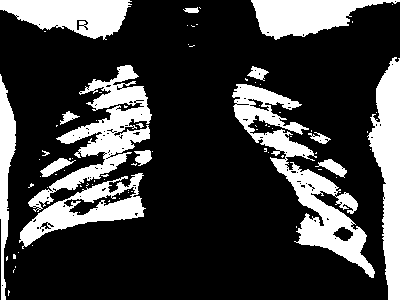

In [47]:
mask

In [49]:
image = cv2.imread('E:\\COVID\\NonAugmentedTrain\\Testing\\3.jpeg')
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))


width: 400 pixels
height: 300 pixels
channels: 3


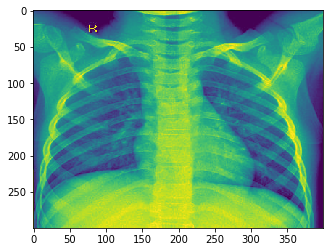

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('E:\\COVID\\NonAugmentedTrain\\Testing\\3.jpeg'))

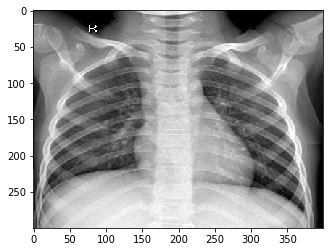

In [51]:
plt.imshow(image)

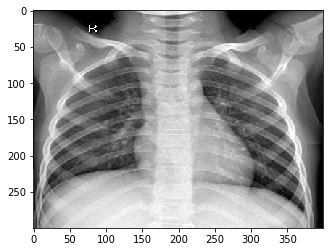

In [52]:

img = cv2.imread('E:\\COVID\\NonAugmentedTrain\\Testing\\3.jpeg', 1)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(gray_img)

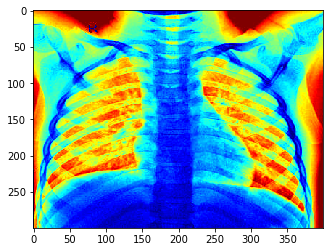

In [53]:
heatmap_img = cv2.applyColorMap(gray_img, cv2.COLORMAP_JET)
plt.imshow(heatmap_img)